### Visualizing the dataset


In [2]:
import os
import pandas as pd
import soundfile as sf
from scipy import signal 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#get the path of the file 
file_name = "Dataset\\birdsong_metadata.csv"
current_dir = os.getcwd() 

file_path = os.path.join(current_dir, file_name) 
print("Current Directory:", file_path)

Current Directory: C:\Users\bensa\Documents\Aberdeen University\University\Year 4\Session 2\EG4578\BirdClassification\Dataset\birdsong_metadata.csv


In [4]:
df_birdsongs_metadata = pd.read_csv(file_path)
display(df_birdsongs_metadata)

,file_id,genus,species,english_cname,who_provided_recording,country,latitude,longitute,type,license
0,132608,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"female, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
1,132611,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"flight call, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
2,35068,Acanthis,flammea,Common Redpoll,Sander Bot,Netherlands,52.8176,6.4326,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/
3,82715,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
4,64685,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
...,...,...,...,...,...,...,...,...,...,...
259,132392,Turdus,philomelos,Song Thrush,david m,United Kingdom,54.1200,-0.5445,song,http://creativecommons.org/licenses/by-nc-nd/3.0/
260,146756,Turdus,philomelos,Song Thrush,David Darrell-Lambert,United Kingdom,51.6608,0.0031,song,http://creativecommons.org/licenses/by-nc-sa/3.0/
261,27060,Vanellus,vanellus,Northern Lapwing,Patrik berg,Sweden,58.4051,14.3028,song,http://creativecommons.org/licenses/by-nc-sa/3.0/
262,97982,Vanellus,vanellus,Northern Lapwing,Herman van der Meer,Netherlands,52.1520,4.3470,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/


In [5]:
unique_bird_names = set(df_birdsongs_metadata["english_cname"])
print("Birds: ", unique_bird_names)
print("Number of unique birds: ", len(unique_bird_names))

Birds:  {'Common Redshank', 'Eurasian Blackcap', 'Common Whitethroat', 'African Pied Wagtail', 'Western Yellow Wagtail', 'Rock Dove', 'Common Chiffchaff', 'Barn Swallow', 'Eurasian Jay', 'Long-tailed Tit', 'Western Jackdaw', 'Meadow Pipit', 'Eurasian Blue Tit', 'European Bee-eater', 'Black-headed Gull', 'Common Cuckoo', 'Common Chaffinch', 'European Nightjar', 'European Golden Plover', 'Willow Ptarmigan', 'Marsh Warbler', 'Eurasian Coot', 'Grey Partridge', 'Canada Goose', 'Great Tit', 'Common Blackbird', 'Dunnock', 'Eurasian Reed Warbler', 'Rook', 'Willow Warbler', 'Common Linnet', 'Spotted Flycatcher', 'European Green Woodpecker', 'Redwing', 'Goldcrest', 'Eurasian Bullfinch', 'Northern Lapwing', 'Common Starling', 'Willow Tit', 'Eurasian Treecreeper', 'Common Pheasant', 'Eurasian Wryneck', 'Coal Tit', 'Eurasian Nuthatch', 'Eurasian Golden Oriole', 'European Greenfinch', 'Red Crossbill', 'European Turtle Dove', 'Common Redstart', 'Tawny Owl', 'Eurasian Skylark', 'European Herring Gull'

In [6]:
# print the number of occurrences of each bird
print(df_birdsongs_metadata['english_cname'].value_counts().to_dict())

{'Common Redpoll': 3, 'Marsh Warbler': 3, 'European Green Woodpecker': 3, 'Eurasian Magpie': 3, 'Willow Warbler': 3, 'Wood Warbler': 3, 'Common Chiffchaff': 3, 'Common Redstart': 3, 'Common Pheasant': 3, 'European Honey Buzzard': 3, 'Coal Tit': 3, 'Grey Partridge': 3, 'Eurasian Tree Sparrow': 3, 'House Sparrow': 3, 'Great Tit': 3, 'Eurasian Golden Oriole': 3, 'Spotted Flycatcher': 3, 'Western Yellow Wagtail': 3, 'African Pied Wagtail': 3, 'European Bee-eater': 3, 'Common Nightingale': 3, 'European Golden Plover': 3, 'Grey Plover': 3, 'Willow Tit': 3, 'Garden Warbler': 3, 'Song Thrush': 3, 'Common Blackbird': 3, 'Redwing': 3, 'Eurasian Wren': 3, 'Common Redshank': 3, 'Wood Sandpiper': 3, 'Lesser Whitethroat': 3, 'Common Whitethroat': 3, 'Eurasian Blackcap': 3, 'Marsh Tit': 3, 'Common Starling': 3, 'Tawny Owl': 3, 'European Turtle Dove': 3, 'Eurasian Collared Dove': 3, 'Eurasian Nuthatch': 3, 'Goldcrest': 3, 'Eurasian Bullfinch': 3, 'Dunnock': 3, 'Red Crossbill': 3, 'River Warbler': 3, '

### Inspecting the Audio files

In [7]:
# Create a spectogram for "Common Redpoll"

In [8]:
#get the directory of the bird songs
song_path = os.path.join(current_dir, "Dataset\\songs\\songs") 
print(song_path)

C:\Users\bensa\Documents\Aberdeen University\University\Year 4\Session 2\EG4578\BirdClassification\Dataset\songs\songs


In [9]:
#select only the common redpoll data 
df_common_redpoll_data = df_birdsongs_metadata[df_birdsongs_metadata['english_cname'] == "Common Redpoll"]
#select the file_ids 
display(df_common_redpoll_data)

,file_id,genus,species,english_cname,who_provided_recording,country,latitude,longitute,type,license
0,132608,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"female, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
1,132611,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"flight call, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
2,35068,Acanthis,flammea,Common Redpoll,Sander Bot,Netherlands,52.8176,6.4326,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/


In [10]:
#testing 
sound_file = "xc132608.flac"
# sound_file = "xc132611.flac"
# sound_file = "xc35068.flac"

sound_file_path = os.path.join(song_path, sound_file)
print(sound_file_path)
print(os.path.isfile(sound_file_path))

C:\Users\bensa\Documents\Aberdeen University\University\Year 4\Session 2\EG4578\BirdClassification\Dataset\songs\songs\xc132608.flac
True


In [11]:
#load the audio file as a numpy array
audio_data, sample_rate = sf.read(sound_file_path) 
print("samplerate: ", samplerate)
duration_in_seconds = round(len(audio_data) / sample_rate, 2)
print(f"Audio duration: {duration_in_seconds} seconds")

NameError: name 'samplerate' is not defined

### Plot the audio signal and its spectogram

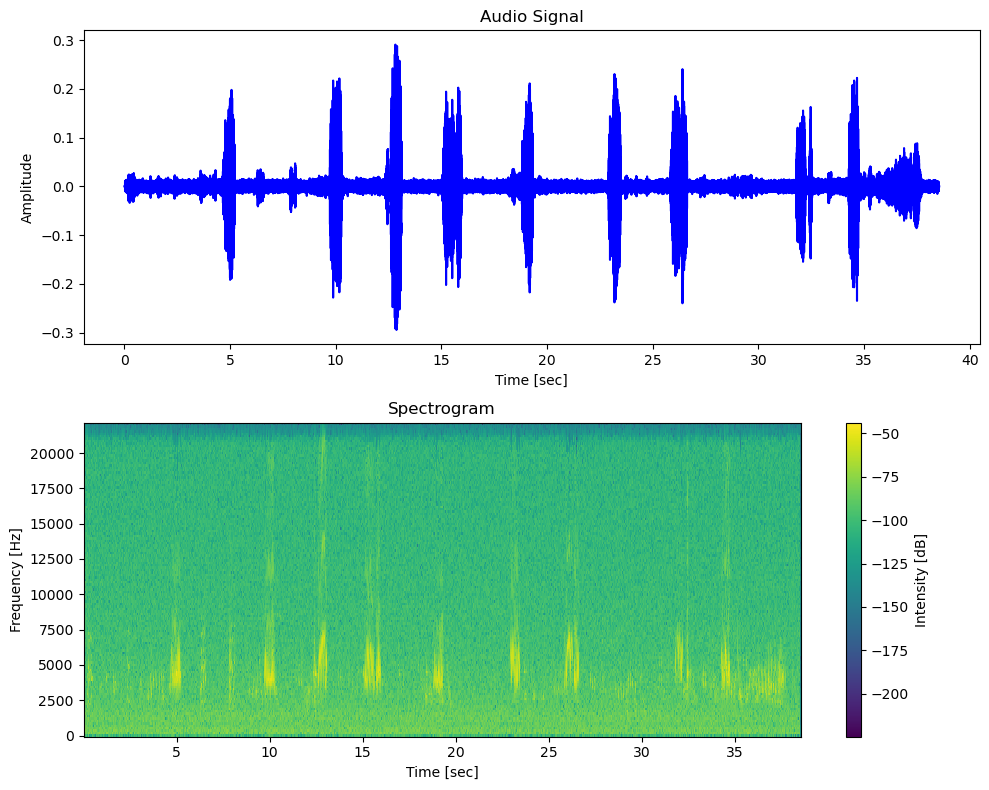

In [12]:
#Create a time axis for the audio signal
time_audio = np.arange(0, len(audio_data)) / sample_rate

#Create a spectrogram
frequencies, times, spectrogram = signal.spectrogram(audio_data, fs=sample_rate)

# Set the figure size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the audio signal on the top
ax1.plot(time_audio, audio_data, color='blue')
ax1.set_title('Audio Signal')
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Amplitude')

# Plot the spectrogram on the bottom
pcm = ax2.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='auto')  # Using log scale for better visualization
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')
ax2.set_title('Spectrogram')

# Add colorbar to the figure
cbar = fig.colorbar(pcm, ax=ax2, label='Intensity [dB]')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

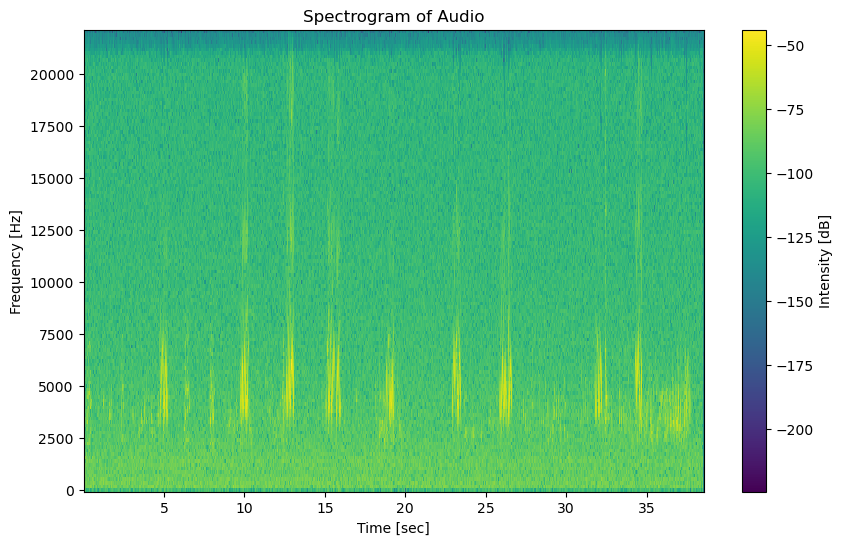

In [13]:
#for the cnn
# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='auto')  # Using log scale for better visualization
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Audio')
plt.colorbar(label='Intensity [dB]')
plt.show()